In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Crop_recommendation.csv')
print(df)


        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]


In [3]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [4]:
#Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=0)

In [5]:
#Labelling the column with Categorical data 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)

In [7]:
#Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [8]:
#Predicting the Test set results
y_pred=classifier.predict(X_test)


In [9]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
cm

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 36,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 38,  0,  0,

In [10]:
ac = accuracy_score(y_test,y_pred)
ac

0.9886363636363636

In [11]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        40
      banana       1.00      1.00      1.00        42
   blackgram       1.00      0.95      0.97        40
    chickpea       1.00      1.00      1.00        42
     coconut       1.00      1.00      1.00        39
      coffee       1.00      1.00      1.00        39
      cotton       1.00      1.00      1.00        37
      grapes       1.00      1.00      1.00        36
        jute       0.84      0.97      0.90        37
 kidneybeans       1.00      1.00      1.00        38
      lentil       0.95      1.00      0.97        37
       maize       1.00      1.00      1.00        40
       mango       1.00      1.00      1.00        34
   mothbeans       1.00      1.00      1.00        44
    mungbean       1.00      1.00      1.00        34
   muskmelon       1.00      1.00      1.00        38
      orange       1.00      1.00      1.00        44
      papaya       1.00    

<AxesSubplot:ylabel='None'>

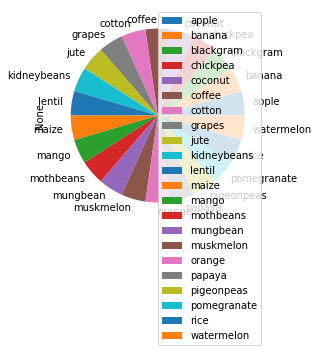

In [13]:
df.groupby('label').size().plot(kind='pie', legend=True)